# **MÓDULO 14 - Exercício**
# Pré Processamento dos Dados - A primeira etapa Pré Modelagem

Para nossa atividade usaremos uma base de churn também, porém essa base não diz respeito a serviços bancários e sim serviços de internet, telefone e tv - Telecomunicação.

Vamos realizar aqui as etapas de limpeza e tratamento de dados vistos durante a aula, porém aplicados a essa base nova.

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import warnings

warnings.filterwarnings("ignore")

In [5]:
#Lembrem-se sempre de alterar a importação dos dados de acordo com o diretório de vocês.
df = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=';')

df.head(10)

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes
5,9305-CDSKC,NaN,0,No,No,8,Yes,Fiber optic,No,No,Yes,Month-to-month,Electronic check,NaN,820.50,NaN
6,1452-KIOVK,NaN,0,No,Yes,22,Yes,Fiber optic,No,No,Yes,Month-to-month,Credit card (automatic),NaN,1949.40,NaN
7,6713-OKOMC,NaN,0,No,No,10,No,DSL,Yes,No,No,Month-to-month,Mailed check,NaN,301.90,NaN
8,7892-POOKP,NaN,0,Yes,No,28,Yes,Fiber optic,No,Yes,Yes,Month-to-month,Electronic check,NaN,3046.05,NaN
9,6388-TABGU,NaN,0,No,Yes,62,Yes,dsl,Yes,No,No,One year,Bank transfer (automatic),NaN,3487.95,NaN


Legenda dos dados:

*   **CustomerID** : Esse é o ID único de cada cliente nosso da rede de produtos de telecomunicação.

*   **Genero** : O genero dos nossos clientes.

*   **Idoso** : Se nosso cliente tem acima de 60 anos ou não. (Sim = 1 | Não = 0)

*   **Casado** : Se nosso cliente é casado ou não.

*   **Dependents** : Se cliente tem dependentes.

*   **Tempo_como_Cliente** : Tempo em meses que nosso cliente está com a nossa empresa.

*   **PhoneService** : Se ele contratou serviço telefônico com a nossa empresa.

*   **Servico_Internet** : Qual o tipo de serviço de internet contratado.

*   **Servico_Seguranca** : Se ele contratou serviço de segurança com a nossa empresa.

*   **Suporte_Tecnico** : Se já acionou o suporte técnico.

*   **StreamingTV** : Se ele contratou serviço de streaming para TV.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **Tipo_Contrato** : Qual o tipo de contrato dos nossos clientes, se era mensal, anual etc.

*   **PaymentMethod** : Forma de Pagamento.

*   **Pagamento_Mensal** : Quanto o cliente pagava mensalmente.

*   **Total_Pago** : Total já pago pelo cliente para nossa companhia.

*   **Churn** : Nossa coluna mais importante, se nosso cliente nos abandonou ou não.




# 1 - Carregue a base, verifique se os tipos de dados estão de acordo com cada coluna e caso não estejam realize a transformação dos tipos de dados.

In [81]:
maindf = pd.read_csv("CHURN_TELECON_MOD08_TAREFA.csv", delimiter=";")
maindf.head()

,customerID,Genero,Idoso,Casado,Dependents,Tempo_como_Cliente,PhoneService,Servico_Internet,Servico_Seguranca,Suporte_Tecnico,StreamingTV,Tipo_Contrato,PaymentMethod,Pagamento_Mensal,Total_Pago,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,DSL,No,No,No,Month-to-month,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,DSL,Yes,No,No,One year,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,DSL,Yes,No,No,Month-to-month,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,DSL,Yes,Yes,No,One year,Bank transfer (automatic),NaN,1840.75,No
4,9237-HQITU,NaN,0,No,No,2,Yes,Fiber optic,No,No,No,Month-to-month,Electronic check,NaN,151.65,Yes


# 2 - Esse exercício faremos por etapas:
A) Verifique se temos colunas com dados faltantes e traga a % dos dados faltantes por coluna.

In [84]:
(maindf.isnull().sum() / len(maindf)) * 100

customerID             0.00
Genero                 0.48
Idoso                  0.00
Casado                 0.00
Dependents             0.00
Tempo_como_Cliente     0.00
PhoneService          59.28
Servico_Internet       0.00
Servico_Seguranca      0.00
Suporte_Tecnico        0.00
StreamingTV            0.00
Tipo_Contrato          0.00
PaymentMethod          0.00
Pagamento_Mensal      13.00
Total_Pago             0.00
Churn                  0.20
dtype: float64

Observando os valores nulos presentes no DataFrame podemos perceber que temos valores nulos nas colunas "Genero", "PhoneService", "Pagamento_Mensal" e "Churn" (OBS: A coluna Churn é a nossa coluna alvo, ou seja, a conluna que iremos tentar prever através do algorítmo de ML, sendo assim, é uma coluna delicada, que exige cuidado ao lidar com os dados).

### Variável Genero

Iremos iniciar o tratamento a partir da coluna Genero.

Considerando o contexto da análise e o significado da coluna, podemos inferir que os dados presentes não são tão significantes para a definição do valor da nossa variável alvo, além disso, apenas 0.4% dos dados presentes nessa coluna são nulos. Devido a essas características iremos optar pela remoção dos registros que possuem valores nulos presentes.

In [89]:
maindf.dropna(subset=["Genero"], inplace=True)
(maindf.isnull().sum() / len(maindf)) * 100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
PhoneService          59.565916
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

Após os tratamentos realizados na coluna Genero, podemos notar que a grande maioria dos valores nulos presentes no nosso DataFrame foram removidos, mesmo em campos diferentes da coluna Genero, e isso ocorreu devido ao fato de que alguns registros possuiam valores nulos em multiplas colunas, além da coluna Genero. Observe que a coluna "Churn" também teve seus valores nulos removidos, e em alguns casos, isso pode ser preocupante, pois quando perdemos registros em nossa variável alvo, também perdemos precisão e eficiência no nosso futuro algorítmo, porém nesse caso, apenas 0.2% dos registros da coluna churn eram nulos, e esses 0.2% perdidos estavam inclusos nos 0.4% que consideramos aceitável perder ao removermos os valores nulos da coluna Genero.

### Variável PhoneService

Vamos agora tratar as ultimas duas colunas que ainda possuem valores nulos presentes, iniciaremos pela coluna "PhoneService".

Inicialmente poderíamos considerar a abordagem de remoção de registros, porém, observando a porcentagem de valores nulos, chegamos a conclusão que essa abordagem não seria a mais recomendada, pois caso optassemos por esse caminho, perderíamos cerca 59% dos nossos dados, oque obviamente influenciaria negativamente a performance do nosso algorítmo.

A segunda opção seria substituir os valores na coluna pelo valor mais frequente, o que poderia ser uma abordagem válida. No entanto, ao observarmos o significado da coluna (se o cliente possui ou não serviço de telefonia) e o contexto da análise, concluímos que esse campo provavelmente não terá uma grande influência na definição da nossa variável alvo. Além disso, buscamos evitar ao máximo a inserção desnecessária de dados artificiais no nosso DataFrame, para minimizar possíveis vieses. Dessa forma, optamos por seguir para a terceira abordagem.
    
A terceira abordagem seria a remoção da coluna PhoneService, para evitar qualquer possibilidade de enviesamento do nosso DataFrame, além de ser a abordagem mais simples e eficiente dada a situação.

In [94]:
# Removendo a coluna PhoneService dos dados;
maindf.drop(["PhoneService"], axis=1, inplace=True)
(maindf.isnull().sum() / len(maindf)) * 100

customerID             0.000000
Genero                 0.000000
Idoso                  0.000000
Casado                 0.000000
Dependents             0.000000
Tempo_como_Cliente     0.000000
Servico_Internet       0.000000
Servico_Seguranca      0.000000
Suporte_Tecnico        0.000000
StreamingTV            0.000000
Tipo_Contrato          0.000000
PaymentMethod          0.000000
Pagamento_Mensal      12.580386
Total_Pago             0.000000
Churn                  0.000000
dtype: float64

Após realizarmos a remoção do campo "PhoneService", nos resta apenas a coluna "Pagamento_Mensal" para realizarmos os tratamentos. Neste caso, se trata de uma coluna que possívelmente possui uma maior importância para nosso algorítmo, pois se trata do valor pago pelo cliente para manutenção dos serviços, e podemos considerar que essa informação certamente tem grande influencia na decisão do usuário de abandonar ou não os serviços contratados.

Primeiramente vamos verificar as principais informações estatísticas no campo para analisar se é viável preenchermos os valores nulos com o valor da média ou mediana.

In [98]:
maindf["Pagamento_Mensal"].describe()

count    2175.000000
mean       65.607563
std        29.931520
min        18.400000
25%        39.500000
50%        71.450000
75%        90.250000
max       118.650000
Name: Pagamento_Mensal, dtype: float64

Observando os valores da Média e Mediana, podemos notar que não existe uma diferença muito grande entre as duas medidas, então isso nos indica que nosso campo deve seguir uma distribuição que lembra uma distribuição normal.

#### Gráfico Boxplot

Vamos plotar inicialmente um gráfico BoxPlot para verificar se existem Outliers no nosso campo, e também para termos uma ideia inicial da distribuição dos dados nesse campo.

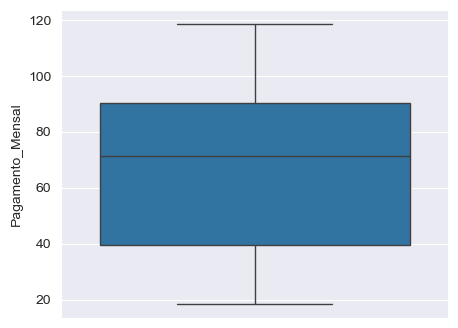

In [103]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=maindf["Pagamento_Mensal"])
plt.show()

Observando o gráfico BoxPlot, podemos perceber que o valor da nossa média está levemente deslocado do centro dos nossos dados, oque pode indicar alguma anomalia na distribuição, porém, não identificamos Outliers

#### Gráfico Histograma

Para entendermos de forma mais detalhada a distribuição, iremos plotar um gráfico histograma, a fim de entender as curvas de distribuição dos dados.

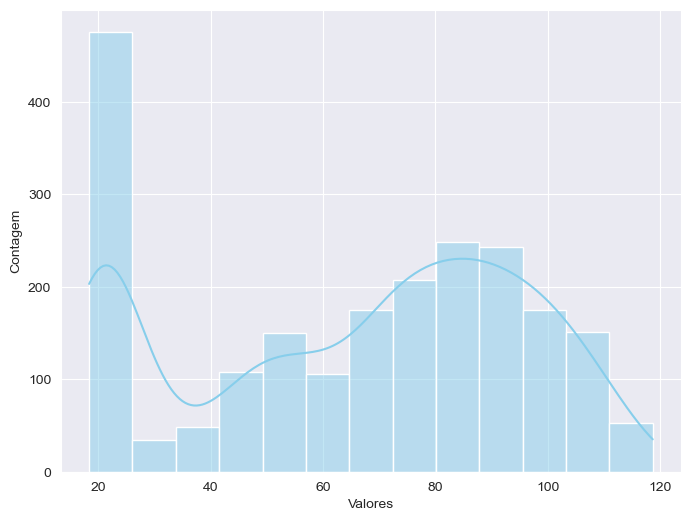

In [108]:
# Plotando o gráfico histplot;
sns.set_style("darkgrid")
plt.figure(figsize=(8, 6))
sns.histplot(data=maindf, x="Pagamento_Mensal", kde=True, color="skyblue")
plt.xlabel("Valores")
plt.ylabel("Contagem")
plt.show()

Observando o gráfico Histograma, podemos notar que de fato, com excessão de um pico de registros em torno da marca dos 23,00 R$, os nossos dados seguem um formato parecido com uma forma de sino, com a maioria dos valores se concentrando próximos da média, conforme oque se espera de uma distribuição normal, porém, devido a essa pequena variação entre os valores da Média e Mediana, iremos optar pela substituição utilizando o valor da Mediana, pois o valor da média, conforme observamos, está sendo levemende deslocado da posição ideal, devido ao pico de registros observada.

In [111]:
# Substituindo os valores nulos pela Mediana;
mediana = maindf["Pagamento_Mensal"].median()
maindf["Pagamento_Mensal"].fillna(mediana, inplace=True)

# 3 - Verifique se encontramos valores digitados incorretamente, ou com letras maiusculas ou minusculas, ou até mesmo mesmos valores porém escritos de forma dirente e corrija.

Nesta etapa de padronização dos valores iremos inicialmente padronizar os nomes das variáveis do nosso DataFrame, deixando todas no padrão de letras minúsculas.

In [115]:
# renomeando as colunas do DataFrame;
maindf.columns = [column.lower() for column in maindf.columns]
maindf.columns

Index(['customerid', 'genero', 'idoso', 'casado', 'dependents',
       'tempo_como_cliente', 'servico_internet', 'servico_seguranca',
       'suporte_tecnico', 'streamingtv', 'tipo_contrato', 'paymentmethod',
       'pagamento_mensal', 'total_pago', 'churn'],
      dtype='object')

Após renomearmos as colunas iremos agora verificar por possíveis valores com erros de digitação ou fora do padrão para tratá-los de forma adequada. Para isso, iremos começar verificando a quantidade de valores únicos no DataFrame.

In [38]:
# Selecionando os valores unicos presentes em cada uma das colunas do DataFrame;
unicos = []
for column in maindf.columns:
    unico = maindf[column].unique()
    unicos.append({column: unico})

for x in unicos:
    for column, values in x.items():
        print(f"Coluna: {column}")
        print(f"Valores únicos: {values}\n")

Coluna: customerid
Valores únicos: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']

Coluna: genero
Valores únicos: ['Female' 'Male' 'F' 'M' 'f']

Coluna: idoso
Valores únicos: [0 1]

Coluna: casado
Valores únicos: ['Yes' 'No']

Coluna: dependents
Valores únicos: ['No' 'Yes']

Coluna: tempo_como_cliente
Valores únicos: [ 1 34  2 45 52 71 10 21 12 58 49 30 47 72 17 27  5 46 11 70 63 13 69 43
 15 25  8 60 18 66  9  3 31 50 64 62 56  7 42 35 48 29 65 38 68 32 55 37
 36 41  6  4 33 67 23 57 61 14 22 16 20 53 40 59 24 44 19 54 51 28 26  0
 39]

Coluna: servico_internet
Valores únicos: ['DSL' 'No' 'Fiber optic' 'dsl']

Coluna: servico_seguranca
Valores únicos: ['No' 'Yes' 'No internet service']

Coluna: suporte_tecnico
Valores únicos: ['No' 'Yes' 'No internet service']

Coluna: streamingtv
Valores únicos: ['No' 'No internet service' 'Yes']

Coluna: tipo_contrato
Valores únicos: ['Month-to-month' 'One year' 'Two year']

Coluna: paymentmethod
Valores únicos:

Observando a lista de valores unicos por variável, podemos perceber alguns erros de digitação e padrões diferentes, e isso futuramente iria influenciar negativamente nossas análises, por isso, iremos padronizar os campos de texto para facilitar nosso trabalho mais a frente.

Iremos iniciar pela coluna "genero" que como podemos observar, possui padrões de digitação variados, iremos então, padroniza-los.

In [64]:
# Transformando todos os valores do campo "genero" em valores minúsculos;
maindf["genero"].replace(["Female", "Male"], ["F", "M"], inplace=True)
maindf["genero"] = maindf["genero"].str.upper()
maindf["genero"].unique()

array(['F', 'M'], dtype=object)

Observando os valores unicos que restaram no nosso campo, podemos perceber que o tratamento foi um sucesso. Seguindo o tratamento, iremos agora para a coluna "servico_internet"

In [46]:
# Transformando todos os valores do campo "servico_internet" em valores capitalizados;
maindf["servico_internet"] = maindf["servico_internet"].str.capitalize()
maindf["servico_internet"].unique()

array(['Dsl', 'No', 'Fiber optic'], dtype=object)

Observando as próximas colunas, podemos notar que as colunas "servico_seguranca, suporte_tecnico e streamingtv" possuem o mesmo erro, que é a insersão errônea do valor "No internet service", sendo assim, podemos realizar um tratamento um pouco mais abrangente no nosso DataFrame, ao invés de tratar coluna a coluna individualmente.

Iremos simplesmente substituir todos os valore "No internet service" presentes no nosso DataFrame pelo valor "No".

In [49]:
# Substituindo todos os valores "No internet service" presentes no DataFrame pelo valor "No";
maindf.replace("No internet service", "No", inplace=True)

Para verificar a eficácia dos nossos tratamentos, iremos realizar novamente uma verificação geral dos valores únicos atuais do nosso DataFrame

In [52]:
# Selecionando os valores unicos presentes em cada uma das colunas do DataFrame;
unicos = []
for column in maindf.columns:
    unico = maindf[column].unique()
    unicos.append({column: unico})

for x in unicos:
    for column, values in x.items():
        print(f"Coluna: {column}")
        print(f"Valores únicos: {values}\n")

Coluna: customerid
Valores únicos: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '5702-SKUOB' '1134-YWTYF'
 '6061-GWWAV']

Coluna: genero
Valores únicos: ['F' 'M']

Coluna: idoso
Valores únicos: [0 1]

Coluna: casado
Valores únicos: ['Yes' 'No']

Coluna: dependents
Valores únicos: ['No' 'Yes']

Coluna: tempo_como_cliente
Valores únicos: [ 1 34  2 45 52 71 10 21 12 58 49 30 47 72 17 27  5 46 11 70 63 13 69 43
 15 25  8 60 18 66  9  3 31 50 64 62 56  7 42 35 48 29 65 38 68 32 55 37
 36 41  6  4 33 67 23 57 61 14 22 16 20 53 40 59 24 44 19 54 51 28 26  0
 39]

Coluna: servico_internet
Valores únicos: ['Dsl' 'No' 'Fiber optic']

Coluna: servico_seguranca
Valores únicos: ['No' 'Yes']

Coluna: suporte_tecnico
Valores únicos: ['No' 'Yes']

Coluna: streamingtv
Valores únicos: ['No' 'Yes']

Coluna: tipo_contrato
Valores únicos: ['Month-to-month' 'One year' 'Two year']

Coluna: paymentmethod
Valores únicos: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
